In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

#### Load the fashion MNIST dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 354s 80us/step


#### Normalize the image data to range between 0 and 1

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

#### Reshape the data to fit the model input requirements

In [6]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### Convert the labels into one-hot vectors

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Model Development

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#### Designing a CNN

In [9]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## Model Training

#### Compiling the model

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Train the model on the training data

In [11]:
history=model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 57s 70ms/step - loss: 0.5754 - accuracy: 0.7898 - val_loss: 0.4057 - val_accuracy: 0.8570
Epoch 2/10
750/750 [==============================] - 51s 69ms/step - loss: 0.3602 - accuracy: 0.8699 - val_loss: 0.3480 - val_accuracy: 0.8766
Epoch 3/10
750/750 [==============================] - 51s 68ms/step - loss: 0.3031 - accuracy: 0.8887 - val_loss: 0.3232 - val_accuracy: 0.8828
Epoch 4/10
750/750 [==============================] - 50s 67ms/step - loss: 0.2740 - accuracy: 0.9002 - val_loss: 0.2915 - val_accuracy: 0.8932
Epoch 5/10
750/750 [==============================] - 50s 66ms/step - loss: 0.2480 - accuracy: 0.9081 - val_loss: 0.2941 - val_accuracy: 0.8944
Epoch 6/10
750/750 [==============================] - 51s 68ms/step - loss: 0.2326 - accuracy: 0.9144 - val_loss: 0.2747 - val_accuracy: 0.8985
Epoch 7/10
750/750 [==============================] - 51s 68ms/step - loss: 0.2126 - accuracy: 0.9226 - val_loss: 0.2666 - val_accuracy:

## Evaluation and analysis

In [12]:
import matplotlib.pyplot as plt

#### Evaluate the models performance on the test dataset

In [13]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2758 - accuracy: 0.9037


#### Plot the training and validation accuracy and loss over epochs

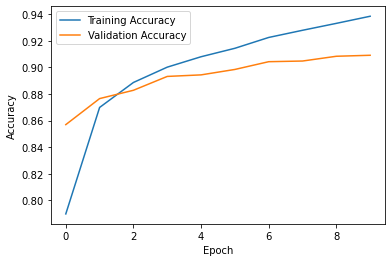

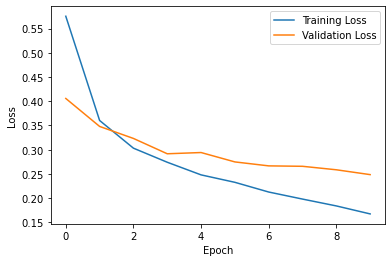

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



313/313 [==============================] - 4s 12ms/step


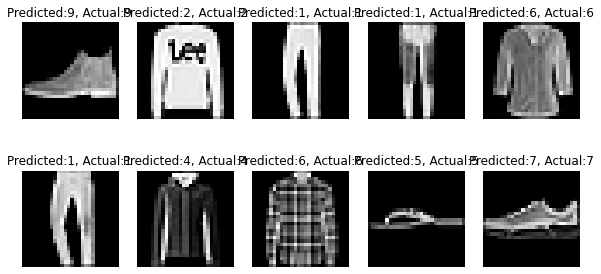

In [15]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
actual_labels = tf.argmax(test_labels, axis=1)

sample_images=test_images[:10]
sample_predicted_labels=predicted_labels[:10]
sample_actual_labels=actual_labels[:10]

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted:{sample_predicted_labels[i]}, Actual:{sample_actual_labels[i]}")
  plt.axis('off')

plt.show()